<a href="https://www.kaggle.com/code/mcebisintleki/codereppy?scriptVersionId=122348585" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Packages required 

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler #for robust feature scaling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_curve, auc
from scipy import stats # Hypthesis testing 
import seaborn as sns


Note1

569
Number of Malignant tumours: 212
Number of Benign tumours   : 357


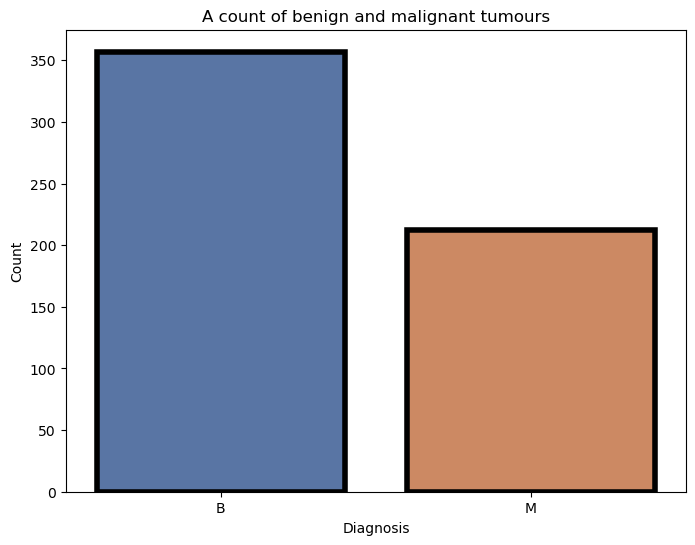

Sample size                    : 569
Number of independent variables: 30


In [2]:
data_df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin/data.csv")

data_df.head().T
#data_df.info()
data_df.diagnosis = data_df.diagnosis.apply(lambda x: 1 if x == 'M' else 0)
#data_df.info()
data_df.shape
data_df.columns
print(data_df.isnull().sum().sum())
data_df = data_df.dropna(axis = 1)



B, M = data_df.diagnosis.value_counts()
xtickmarks = ['B', 'M']

print(f'Number of Malignant tumours: {M}')
print(f'Number of Benign tumours   : {B}')

def createCountplot():
    fig = plt.figure(figsize = (8, 6))
    ax = fig.add_subplot()

    sns.set_theme(style = 'whitegrid')

    sns.countplot(data = data_df, 
              x = data_df.diagnosis, 
              label = 'Count',
              lw = 4,
              ec = 'black').set(title = 'A count of benign and malignant tumours',
                                  xlabel = 'Diagnosis',
                                  ylabel = 'Count')

    ax.set_xticklabels(xtickmarks)
    plt.show()

createCountplot()

variables_to_omit = ['id', 'diagnosis']
input_data = data_df.drop(variables_to_omit, axis = 1)
r, c = input_data.shape
print(f'Sample size                    : {r}')
print(f'Number of independent variables: {c}')


Histograms



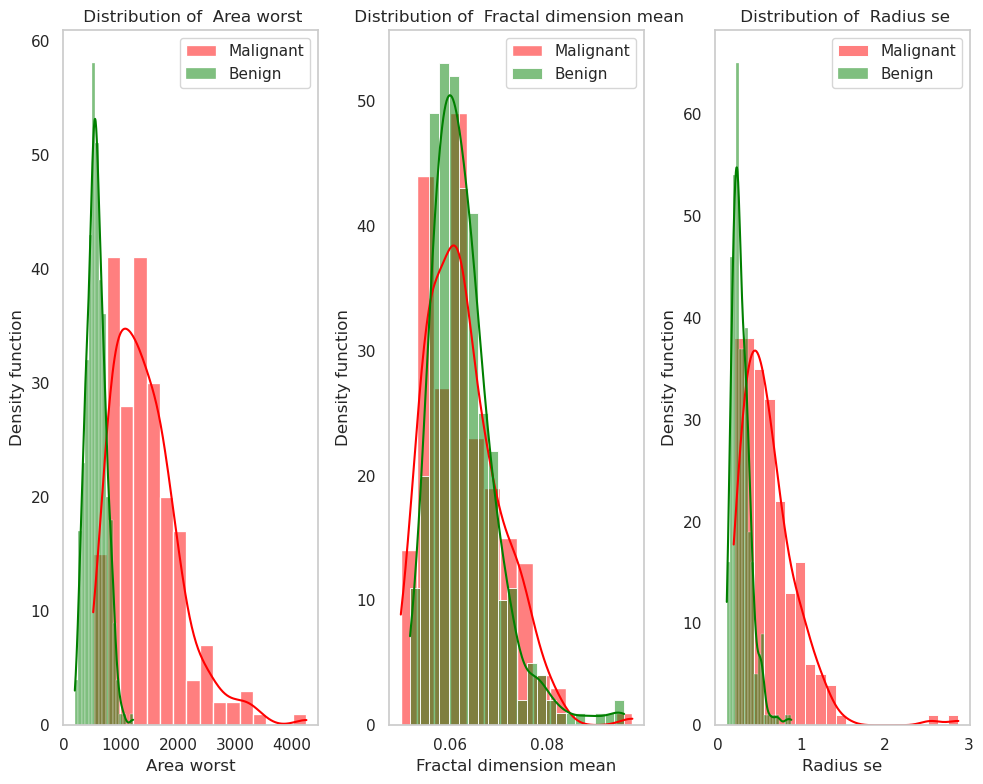

In [3]:
Malignant = data_df[data_df['diagnosis'] == 1]
Benign = data_df[data_df['diagnosis'] == 0]
worst_mean_se = ['area_worst', 'fractal_dimension_mean', 'radius_se']

def makeHistogram(features):
    for feature in features:
        if not type(feature) is str:
            raise TypeError('Only strings are permitted')
            
    fig = plt.figure(figsize = (10, 8))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(1, 3, i + 1)  
        sns.histplot(Malignant[feature], 
                   bins = bins, 
                   color = 'red', 
                   label = 'Malignant',
                   kde = True)
        sns.histplot(Benign[feature], 
                   bins = bins, 
                   color = 'green', 
                   label = 'Benign',
                   kde = True)
        plt.title(str(' Distribution of  ') + str(feature.replace('_', ' ').capitalize()))
        plt.xlabel(str(feature.replace('_', ' ').capitalize()))
        plt.ylabel('Density function')
        plt.legend(loc = 'upper right')
        ax.grid(False)
    
    plt.tight_layout()
    plt.show()

bins = 'fd' #Freedman and Diaconis 

makeHistogram(worst_mean_se)

**Heatmaps** provide an informative way to depict two-dimensional data of the kind we have before us. A *heatmap* is an image in which the colour of each pixel is determined by the corresponding value in the array of data. 

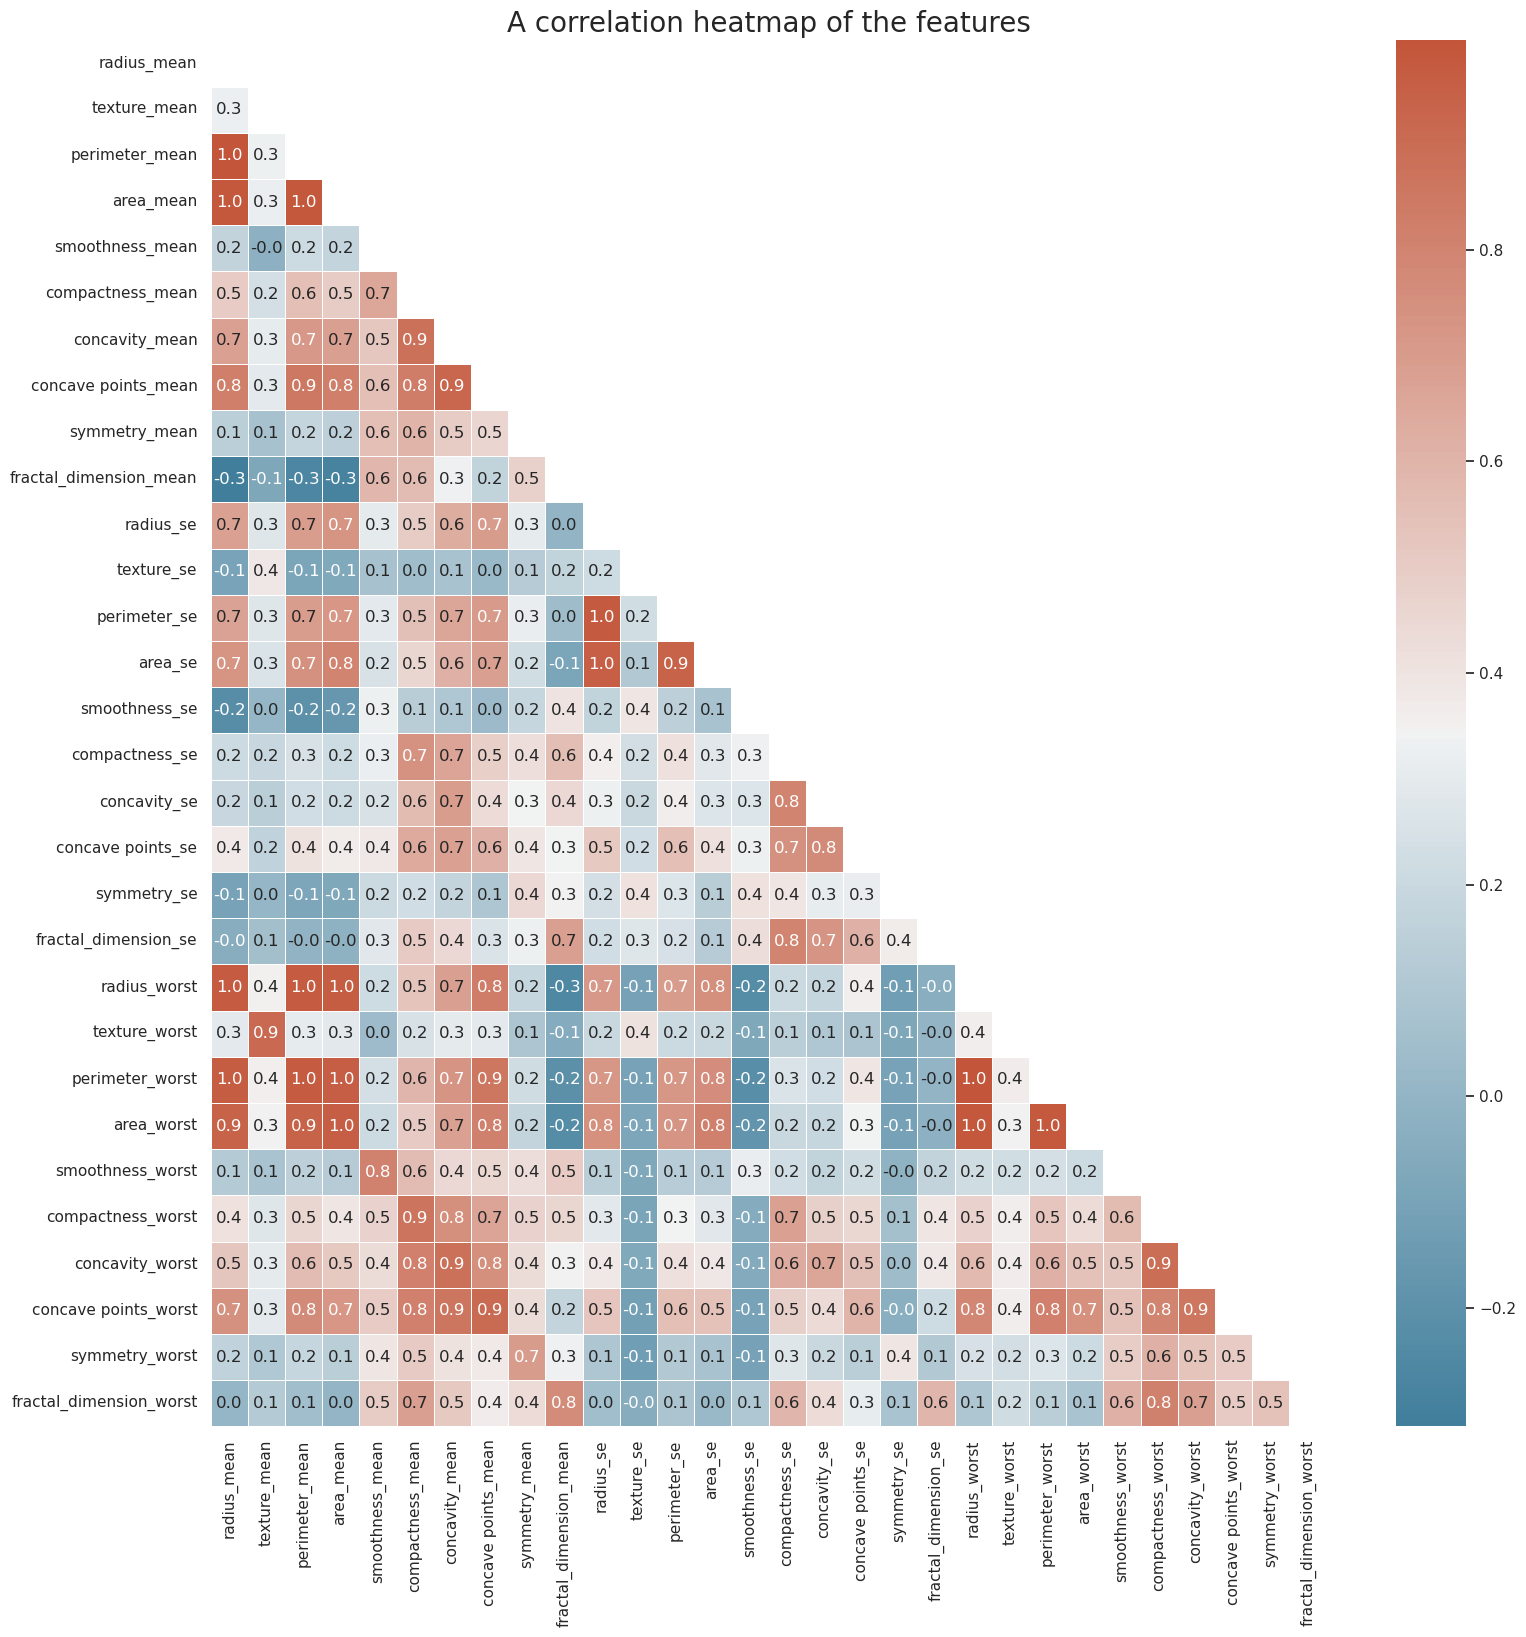

In [4]:
def createHeatmap():
    sns.set_theme(style ='white')
    #Generate a mask for the upper triangular matrix
    mask = np.triu(input_data.corr(), k = 0)

    fig = plt.figure(figsize = (18, 18))
    ax = fig.add_subplot()

    # Generate a custom diverging palette of colours
    cmap = sns.diverging_palette(230, 20, as_cmap = True)

    sns.heatmap(data = input_data.corr(), 
                annot = True, 
                linewidths = 0.5, 
                fmt = '.1f',
                ax = ax, 
                mask = mask,
                cmap = cmap)

    plt.title('A correlation heatmap of the features', fontsize = 20)
    plt.show()

createHeatmap()

More plots

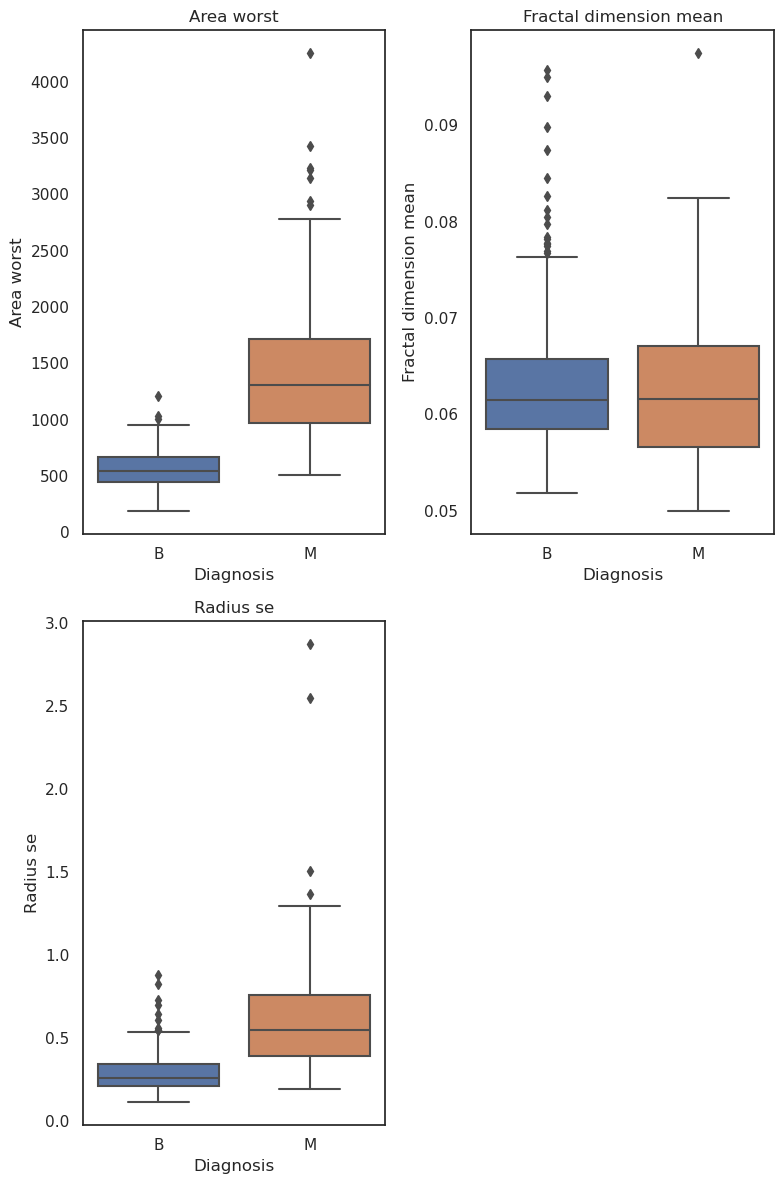

In [5]:
# Create box and whiskers plot for texture mean by diagnosis of tumour
Diagnosis = 'diagnosis'

def makeBoxplot(features):
    fig = plt.figure(figsize = (8, 12))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(2, 2, i + 1)
        sns.boxplot(x = Diagnosis, 
                   y = feature, 
                   data = data_df, 
                   showfliers = True)
        plt.title(str(feature.replace('_', ' ').capitalize()))
        ax.set_xticklabels(xtickmarks)
        ax.set_xlabel(Diagnosis.capitalize())
        ax.set_ylabel(str(feature.replace('_', ' ').capitalize()))
        ax.grid(False)
    
    fig.tight_layout()
    plt.show()

makeBoxplot(worst_mean_se)



Logistic regression plots

Some more box and whiskers plots

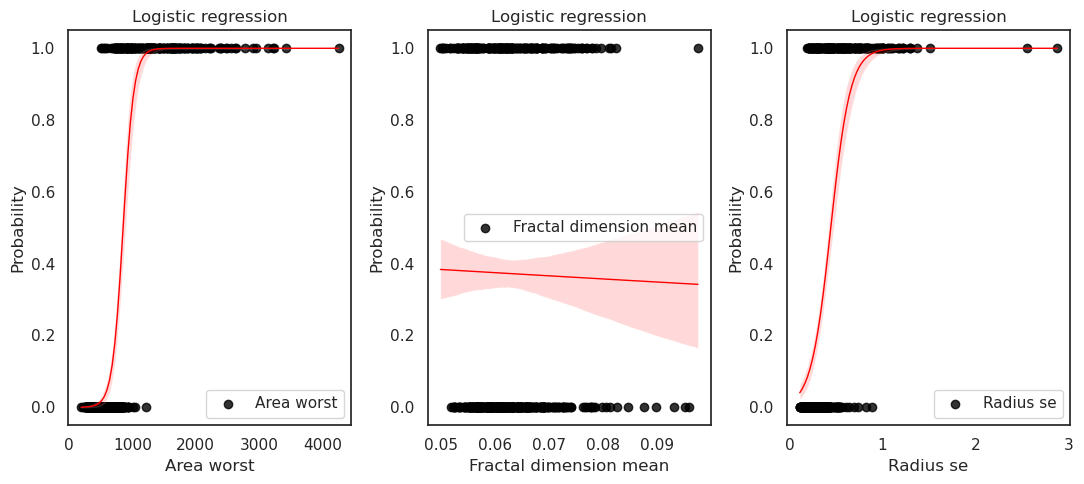

In [6]:
def logistic_regression_plot(features):
    fig = plt.figure(figsize = (11, 5))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(1, 3, i + 1)
        sns.regplot(data = data_df,
                    x = feature, 
                    y = Diagnosis, 
                    logistic = True, 
                    color = 'black',
                    line_kws = {'lw' : 1, 'color' : 'red'},
                    label = str(feature.replace('_', ' ').capitalize()))
        ax.set_xlabel(str(feature.replace('_', ' ').capitalize()))
        plt.ylabel('Probability')
        plt.title('Logistic regression')
        plt.legend()
    
        plt.tight_layout()
        plt.show
    
    return None

logistic_regression_plot(worst_mean_se)


Hypothesis testing using Student's t-test.

In [7]:
# Make a new dataframe with only the desired feature for t test  
hypothesis_test_data = pd.DataFrame(data = data_df[['area_worst', 'diagnosis']])
hypothesis_test_data = hypothesis_test_data.set_index(Diagnosis)
t, p = stats.ttest_ind(hypothesis_test_data.loc[0], hypothesis_test_data.loc[1])
print(f'The t-value: {t}')
print(f'The p-value: {p}')



        

The t-value: [-25.72159026]
The p-value: [2.8288477e-97]


In [8]:
class Hypothesis_T_Test(object):
    def __init__(self, feature, ind_variable = Diagnosis):
        self.feature = feature
        self.ind_variable = ind_variable
        
    def computeTandPValues(self):
        hypothesis_test_data = pd.DataFrame(data = data_df[[self.feature, self.ind_variable]])
        hypothesis_test_data = hypothesis_test_data.set_index(self.ind_variable)
        self.variable_name = lambda : data_df[self.feature].name.replace('_', ' ').capitalize()
        self.t_value, self.p_value = stats.ttest_ind(hypothesis_test_data.loc[0], hypothesis_test_data.loc[1])
        print(f'Variable name: {self.variable_name()}: t-value: {self.t_value}, p-value: {self.p_value}')
        
        return self.t_value, self.p_value

for feature in worst_mean_se:
    HTT = Hypothesis_T_Test(feature)
    HTT.computeTandPValues()

Variable name: Area worst: t-value: [-25.72159026], p-value: [2.8288477e-97]
Variable name: Fractal dimension mean: t-value: [0.30571113], p-value: [0.7599368]
Variable name: Radius se: t-value: [-16.39635103], p-value: [9.73894866e-50]


Some correlation 

In [9]:
# Create a correlation matrix
corr_matrix = input_data.corr().abs()
# Select upper triangle of correlation matrix
upper_triangular = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
# Find index of feature columns with correlation greater than 0.95
correlation_threshold = 0.95
features_to_omit = [column for column in upper_triangular.columns if any(upper_triangular[column] > correlation_threshold)]
# Remove features to omit 
correlation_data = input_data.drop(input_data[features_to_omit], axis = 1)
correlation_data.columns


Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Machine learning

In [10]:
X = input_data
Y = data_df.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.20, 
                                                    stratify = Y, 
                                                    random_state = 1234)
#Robust feature scaling
rs_object = RobustScaler()
X_train = rs_object.fit_transform(X_train)
X_test = rs_object.transform(X_test)

# Define a function which trains a logistic model
def createModel(X_train, y_train):
    
    
    LogitModel = LogisticRegression(solver = 'lbfgs', 
                             max_iter = 100, 
                             random_state = 1234)
    
    LogitModel.fit(X_train, y_train)  
    
    #Display model accuracy on the training data.
    print(f'Accuracy for the training sample: {LogitModel.score(X_train, y_train):.2f}')
    return LogitModel

#Obtain the training results
model = createModel(X_train, y_train)

Accuracy for the training sample: 0.99


Confusion matrix

[[69  3]
 [ 1 41]]
Accuracy on the test data:  0.96



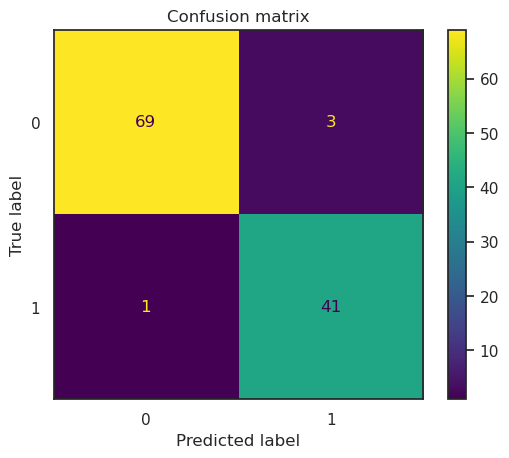

In [11]:

cm = confusion_matrix(y_test, model.predict(X_test))
 
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
 
print(cm)
print(f'Accuracy on the test data: {(TP + TN) / (TP + TN + FN + FP): .2f}')
print()# Print a new line

def displayConfusionMatrix():
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels = model.classes_)
    
    disp.plot()
    plt.grid(visible = False)
    plt.title('Confusion matrix')
    plt.show()

displayConfusionMatrix()

Classification report is used in machine learning to compute accuracy of a classification model from the values of the confusion matrix. In the classification report, precision is a measure of positive predictions.

In [12]:

print(f'Logistic regression model ')
#Check precision, recall, f1-score
print(f'Classification report')
print(classification_report(y_test, model.predict(X_test)))
#Another way to get the models accuracy on the test data
print(f'Accuracy score {accuracy_score(y_test, model.predict(X_test)):.4f}')
print() #Print a new line

Logistic regression model 
Classification report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.93      0.98      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Accuracy score 0.9649



ROC Curve

The AUC score for the logistic regression model is: 0.9947


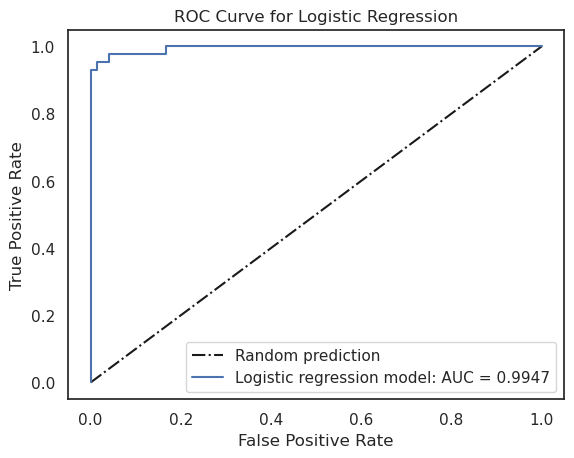

In [13]:
# Compute predicted probabilities and keep results only for positive outcome 
y_pred_prob = model.predict_proba(X_test)[:,1]
# Generate ROC curve values and capture only fpr, and tpr, but not thresholds
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

print(f'The AUC score for the logistic regression model is: {auc(fpr, tpr):.4f}')

def createROC():
    fig = plt.figure()
    ax = fig.add_subplot()

    plt.plot([0, 1], [0, 1], 'k-.', label = 'Random prediction')
    plt.plot(fpr, tpr, label = 'Logistic regression model: AUC = %0.4f' % auc(fpr, tpr))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Logistic Regression')

    ax.grid(False)
    plt.legend()
    plt.show()

createROC()